# Santander Customer Transaction Prediction

## Sources


* [Santander Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-predictio)
* [Financial data modeling with RAPIDS](https://medium.com/rapids-ai/financial-data-modeling-with-rapids-5bca466f348)
* [YH EDA - I want to see all!!](https://www.kaggle.com/youhanlee/yh-eda-i-want-to-see-all)
* [target - true meaning revealed!](https://www.kaggle.com/raddar/target-true-meaning-revealed)

## Import packages

In [102]:
import time

import cudf as gd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# plt.style.available

In [105]:
plt.style.use('ggplot')
sns.set(font_scale=1)
pd.set_option('display.max_columns', 500)

## Load the data

The data is fully anonymized, containing 200 numeric feature variables, from `var_0` to `var_199`, a binary `target` column, and an ID column `ID_code`. Submissions are evaluated on area under the ROC curve, higher the better, with 1 being the perfect score. Despite being anonymous, the data has the same structure as the real data Santander have available to solve the customer transaction prediction problem.

In [106]:
%%time
# Data location
data_path = './data'

# Columns
cols = ['ID_code', 'target'] + [f"var_{i:d}" for i in range(200)]

# Columns type
dtypes = ['int32', 'int32'] + ['float32' for i in range(200)]

# Read the data from the csv file
train_gd = gd.read_csv(f"{data_path}/train.csv", names=cols, dtype=dtypes, skiprows=1)
print(train_gd.shape)

(200000, 202)
CPU times: user 493 ms, sys: 120 ms, total: 613 ms
Wall time: 608 ms


In [107]:
# %%time
# train_pd = pd.read_csv(f"{data_path}/train.csv")
# print(train_pd.shape)

In [108]:
train = train_gd.to_pandas()

## Target analysis

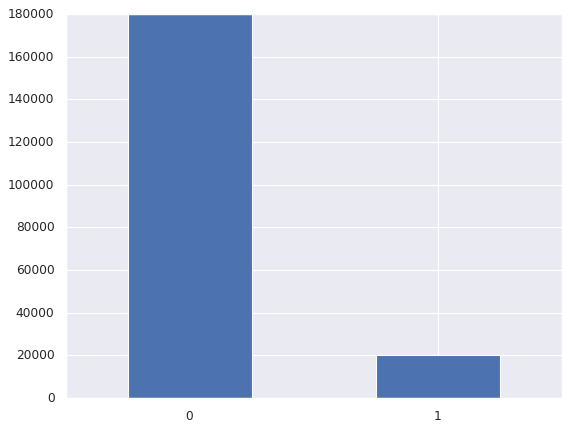

In [109]:
train['target'].value_counts().plot.bar(x='target', rot=0)

The target distribution is imbalanced

## Check for missing values

In [110]:
total = train.isnull().sum(axis=0).sort_values(ascending = False)

In [111]:
total.max()

0

In [112]:
nrows, ncols = train.shape

In [113]:
percent = (train.isnull().sum()/nrows*100).sort_values(ascending = False)

In [114]:
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [115]:
missing_train_data.head()

,Total,Percent
var_199,0,0.0
var_61,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0


Thera are no missing values.

## Exploratory Data Analysis (EDA)

In [116]:
for col in train.columns[2:]:
    print(f"Number of unique values of {col} : {train[col].nunique()} ({train[col].nunique()/nrows*100:.2f}%)")

Number of unique values of var_0 : 94672 (47.34%)
Number of unique values of var_1 : 108932 (54.47%)
Number of unique values of var_2 : 86555 (43.28%)
Number of unique values of var_3 : 74597 (37.30%)
Number of unique values of var_4 : 63515 (31.76%)
Number of unique values of var_5 : 141029 (70.51%)
Number of unique values of var_6 : 38599 (19.30%)
Number of unique values of var_7 : 103063 (51.53%)
Number of unique values of var_8 : 98617 (49.31%)
Number of unique values of var_9 : 49417 (24.71%)
Number of unique values of var_10 : 128764 (64.38%)
Number of unique values of var_11 : 130193 (65.10%)
Number of unique values of var_12 : 9561 (4.78%)
Number of unique values of var_13 : 115181 (57.59%)
Number of unique values of var_14 : 79122 (39.56%)
Number of unique values of var_15 : 19810 (9.90%)
Number of unique values of var_16 : 86918 (43.46%)
Number of unique values of var_17 : 137823 (68.91%)
Number of unique values of var_18 : 139515 (69.76%)
Number of unique values of var_19 : 

Number of unique values of var_164 : 122744 (61.37%)
Number of unique values of var_165 : 119403 (59.70%)
Number of unique values of var_166 : 17902 (8.95%)
Number of unique values of var_167 : 140954 (70.48%)
Number of unique values of var_168 : 97227 (48.61%)
Number of unique values of var_169 : 18242 (9.12%)
Number of unique values of var_170 : 113720 (56.86%)
Number of unique values of var_171 : 125914 (62.96%)
Number of unique values of var_172 : 143366 (71.68%)
Number of unique values of var_173 : 128120 (64.06%)
Number of unique values of var_174 : 134945 (67.47%)
Number of unique values of var_175 : 92659 (46.33%)
Number of unique values of var_176 : 142521 (71.26%)
Number of unique values of var_177 : 85720 (42.86%)
Number of unique values of var_178 : 145235 (72.62%)
Number of unique values of var_179 : 90090 (45.05%)
Number of unique values of var_180 : 123477 (61.74%)
Number of unique values of var_181 : 56164 (28.08%)
Number of unique values of var_182 : 149195 (74.60%)
Nu

In [117]:
a = train['var_68'].value_counts()

In [118]:
a

5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
5.0193    1070
5.0208    1070
5.0202    1069
5.0174    1066
5.0189    1063
5.0203    1063
5.0195    1062
5.0220    1060
5.0204    1059
5.0211    1058
5.0188    1057
5.0157    1054
5.0158    1049
5.0219    1049
5.0190    1048
5.0201    1047
5.0221    1043
5.0207    1040
5.0212    1038
5.0192    1038
5.0184    1035
5.0205    1033
5.0151    1031
5.0197    1029
5.0185    1029
          ... 
4.9978       1
4.9999       1
4.9983       1
4.9995       1
4.9993       1
4.9990       1
4.9989       1
4.9979       1
5.0469       1
5.0000       1
5.0421       1
5.0445       1
5.0444       1
5.0438       1
5.0436       1
5.0434       1
5.0431       1
5.0426       1
5.0422       1
5.0419       1
5.0458       1
5.0418       1
5.0415       1
5.0414       1
5.0412       1
5.0411       1
5.0410       1
5.0409       1
5.0407       1
4.9938       1
Name: var_68, Length: 451, dtype: int64

## Correlation

In [119]:
corr = train.corr()

In [120]:
corr['target'].abs().sort_values(ascending=False)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
             ...   
var_182    0.007198
var_153    0.007103
var_73     0.006460
var_14     0.006332
var_60     0.006265
var_129    0.005880
var_46     0.005690
var_183    0.005467
var_160    0.005135
var_29     0.004682
var_124    0.004218
var_161    0.004168
var_39     0.004090
var_98     0.004074
var_158    0.003817
var_136    0.003554
var_96     0.003037
var_7      0.003025
var_117    0.002591


The correlation between `target` and most `var` columns is very low.

## Distribution regarding to target

In [121]:
from scipy.stats import ks_2samp

In [122]:
target_mask = train['target'] == 1
non_target_mask = train['target'] == 0 

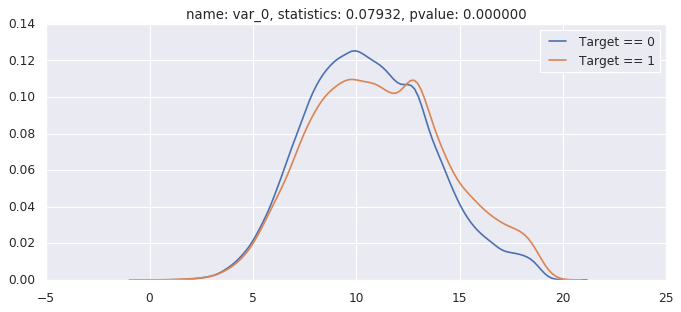

In [126]:
statistics_array = []
# for col in train.columns[2:]:
for col in train.columns[2:3]:
    statistic, pvalue = ks_2samp(train.loc[non_target_mask, col], train.loc[target_mask, col])
    statistics_array.append(statistic)
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    sns.kdeplot(train.loc[non_target_mask, col], ax=ax, label='Target == 0')
    sns.kdeplot(train.loc[target_mask, col], ax=ax, label='Target == 1')

    ax.set_title(f"name: {col}, statistics: {statistic:.5f}, pvalue: {pvalue:5f}")
    plt.show()

The kernel density estimation (KDE) plot above shows the distribution of column `var_0` for both positive and negative samples. The distribution is largely gaussian but a second small bump is also notable, which makes it a bimodal. It is also visually evident that when `6<var_0<13` the probability of having `target==1` is low, when `14<var_0<20` the probability of having `target==1` is high and hard to tell in other region. This indicates that a tree classifier is promising which finds splits like these.

We can also measure the significance of this feature by computing the Kolmogorov-Smirnov KS statistic. Although the two curves have similar trend, the `p_value` is 0.000 so we can reject the null hypothesis that positive and negative samples are drawn from the same continuous distribution. In other words, the features already have strong predictive power regarding the target column.

## Xgboost model

We feed the data as is to a Xgboost model and train it with NVIDIA GPUs. Based on the fact that columns are independent, we intentionally set `colsample_bytree=0.05` and `max_depth=1` so that the tree considers one column at a time and avoids learning fake feature interactions.

In [21]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [22]:
train, valid = train_gd[:-10000], train_gd[-10000:]

In [23]:
x_train = train.drop(['target','ID_code'])
y_train = train['target']
x_valid = valid.drop(['target','ID_code'])
y_valid = valid['target']

In [24]:
xgb_params = {
            'objective': 'binary:logistic',
            'tree_method': 'gpu_hist',
            'max_depth': 1, 
            'eta':0.1,
            'silent':1,
            'subsample':0.5,
            'colsample_bytree': 0.05,  
            'eval_metric':'auc',
}

dtrain = xgb.DMatrix(data=x_train.to_pandas(), label=y_train.to_pandas())
dvalid = xgb.DMatrix(data=x_valid.to_pandas(), label=y_valid.to_pandas())

CPU times: user 1.06 s, sys: 524 ms, total: 1.59 s
Wall time: 1.58 s


In [25]:
%%time
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]

clf = xgb.train(xgb_params, dtrain=dtrain,
                num_boost_round=10000,evals=watchlist,
                early_stopping_rounds=30,maximize=True,
                verbose_eval=1000)

yp = clf.predict(dvalid)

[0]	eval-auc:0.511247	train-auc:0.520422
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 30 rounds.
[1000]	eval-auc:0.876779	train-auc:0.886787
[2000]	eval-auc:0.889861	train-auc:0.902185
[3000]	eval-auc:0.893801	train-auc:0.907658
[4000]	eval-auc:0.895026	train-auc:0.910423
[5000]	eval-auc:0.895787	train-auc:0.912018
[6000]	eval-auc:0.896213	train-auc:0.913239
[7000]	eval-auc:0.896006	train-auc:0.914356
[8000]	eval-auc:0.895863	train-auc:0.915277
[9000]	eval-auc:0.89533	train-auc:0.916135
[9999]	eval-auc:0.894938	train-auc:0.916971


## Feature Engineering

Given the fact that columns are anonymized and independent, it is next to impossible to engineer new features based on domain knowledge or explore feature interactions between different columns. Consequently, we focused on extract more information from a single column. In the following discussion, we again use the column `var_0` as an example for analysis and apply the transformation to all other columns.

One of the most common transformations of a single column is `count` encoding. We used `cudf` to divide the dataframe by the column `var_0` into groups and count the size of each group. Then the counts of each different value of `var_0` is merged back to the dataframe.

In [71]:
var_0_count = train_gd.groupby('var_0').agg({'var_0':'count'})

var_0_count.columns = ['var_0_count']

var_0_count = var_0_count.reset_index()

train_gd = train_gd.merge(var_0_count,on='var_0',how='left')

train_gd.head()[['ID_code','target','var_0','var_0_count']].to_pandas()

,ID_code,target,var_0,var_0_count
0,-82542400,0,11.796200,5
1,-82542384,1,19.458298,1
2,-82542398,0,8.472099,2
3,-82542382,0,12.654400,2
4,-82542399,0,5.279500,1


To verify the predictive power of such count encoding, we further calculate the mean `target` value of each group that have the same count values. As shown in the following figure, there is a notable trend that a group with larger count values has lower `mean target rate`.

In [ ]:
dg = train_gd.groupby('var_0_count').agg({'target':['mean']})
dg.columns = ['target_mean']

Text(0, 0.5, 'target_mean')

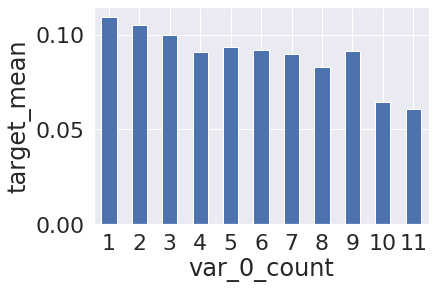

In [74]:
ax = dg.target_mean.to_pandas().plot.bar(rot=0)
ax.set_ylabel('target_mean')

Counting encoding of `var_0` contains information that is orthogonal to `var_0` and hence should improve our model when used together. We applied the count encoding to all columns and run the XGBoost model with both original columns and the new count encoding columns. The end-to-end running time is less than five minutes on a single GPU and the validation AUC is improved to 0.918 from the 0.911 baseline.

In [75]:
# Read the data from the csv file
train_gd = gd.read_csv(f"{data_path}/train.csv", names=cols, dtype=dtypes, skiprows=1)
print(train_gd.shape)

(200000, 202)


In [76]:
%%time
for i in range(200):
    col = f"var_{i:d}"
    var_count = train_gd.groupby(col).agg({col:'count'})
    var_count.columns = [f"{col:s}_count"]
    var_count = var_count.reset_index()
    train_gd = train_gd.merge(var_count, on=col, how='left')

CPU times: user 39.1 s, sys: 9.96 s, total: 49.1 s
Wall time: 49.2 s


In [77]:
%%time
train, valid = train_gd[:-10000], train_gd[-10000:]
x_train = train.drop(['target','ID_code'])
y_train = train['target']
x_valid = valid.drop(['target','ID_code'])
y_valid = valid['target']

xgb_params = {
            'objective': 'binary:logistic',
            'tree_method': 'gpu_hist',
            'max_depth': 1, 
            'eta':0.1,
            'silent':1,
            'subsample':0.5,
            'colsample_bytree': 0.05,  
            'eval_metric':'auc',
}
dtrain = xgb.DMatrix(data=x_train.to_pandas(), label=y_train.to_pandas())
dvalid = xgb.DMatrix(data=x_valid.to_pandas(), label=y_valid.to_pandas())

CPU times: user 4.18 s, sys: 1.45 s, total: 5.63 s
Wall time: 5.63 s


In [78]:
%%time
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]

clf = xgb.train(xgb_params, dtrain=dtrain,
                num_boost_round=10000,evals=watchlist,
                early_stopping_rounds=30,maximize=True,
                verbose_eval=1000)

yp = clf.predict(dvalid)

[0]	eval-auc:0.522483	train-auc:0.527571
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 30 rounds.
[1000]	eval-auc:0.876568	train-auc:0.886771
[2000]	eval-auc:0.891672	train-auc:0.902166
[3000]	eval-auc:0.896636	train-auc:0.907848
[4000]	eval-auc:0.898892	train-auc:0.91069
[5000]	eval-auc:0.899209	train-auc:0.912683
[6000]	eval-auc:0.899184	train-auc:0.91434
[7000]	eval-auc:0.898969	train-auc:0.915724
[8000]	eval-auc:0.899208	train-auc:0.91696
[9000]	eval-auc:0.898933	train-auc:0.918049
Stopping. Best iteration:
[9388]	eval-auc:0.898992	train-auc:0.918391

CPU times: user 23min 29s, sys: 32.9 s, total: 24min 2s
Wall time: 3min 30s


## Can We Make Further Progress?

Yes, but to achieve that, we need to look deeper into the count groups. In the following figures, we plot the KDE of `var_0` , `var_1` and `var_2` with different count groups. An interesting pattern is that for all three vars , the group `count==1` is significantly different from other groups and the variable as a whole. As a matter of fact, this pattern can be found in most of the vars. There are several hypothesis to explain this, such as that `count==1` group is more noisy in nature, or it is an artifact of data imputation, so on so forth.

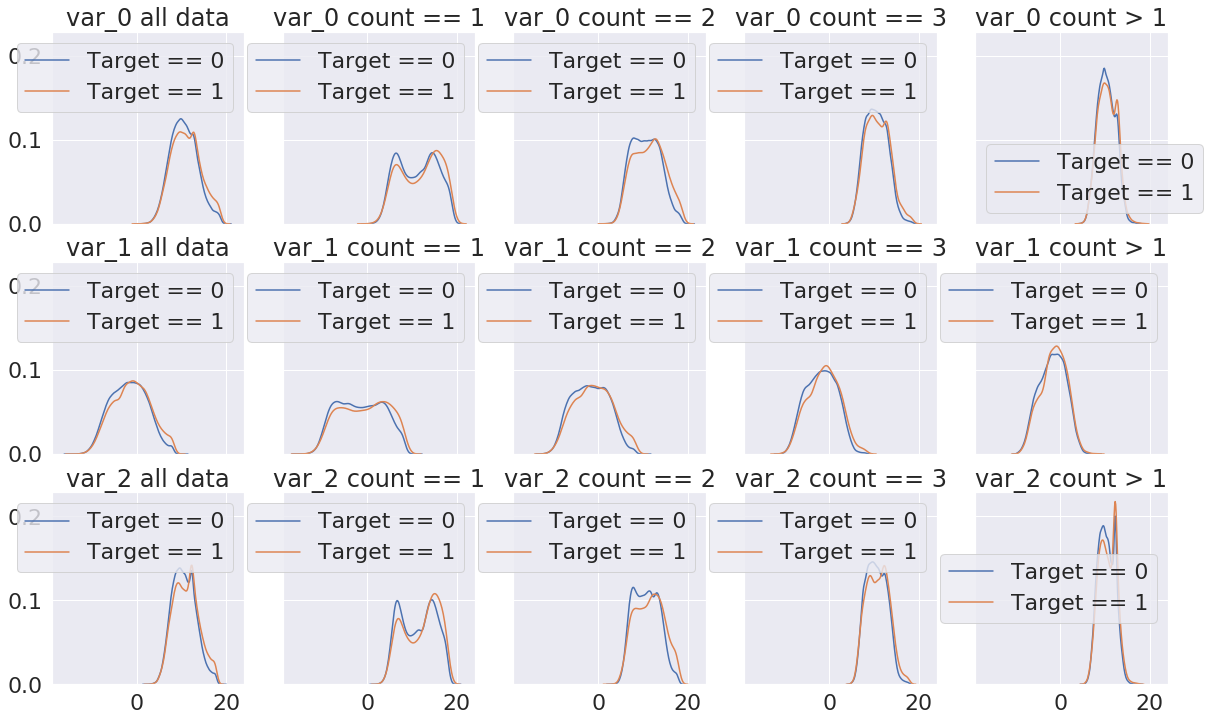

In [79]:
train = train_gd.to_pandas()

fig, axs = plt.subplots(3,5, figsize=(20, 12),sharex=True,sharey=True)

target_mask = train['target'] == 1
non_target_mask = train['target'] == 0 

for c,col in enumerate(['var_0','var_1','var_2']):
    statistic, pvalue = ks_2samp(train.loc[non_target_mask, col], train.loc[target_mask, col])
    sns.kdeplot(train.loc[non_target_mask, col], ax=axs[c,0], label='Target == 0')
    sns.kdeplot(train.loc[target_mask, col], ax=axs[c,0], label='Target == 1')
    axs[c,0].set_title('%s all data'%col)

for c,col in enumerate(['var_0','var_1','var_2']):
    for i in range(1,4):
        train = train_gd.to_pandas()
        train = train[train[f"{col:s}_count"]==i]
        target_mask = train['target'] == 1
        non_target_mask = train['target'] == 0 
        statistic, pvalue = ks_2samp(train.loc[non_target_mask, col], train.loc[target_mask, col])
        sns.kdeplot(train.loc[non_target_mask, col], ax=axs[c,i], label='Target == 0')
        sns.kdeplot(train.loc[target_mask, col], ax=axs[c,i], label='Target == 1')
        axs[c,i].set_title(f"{col:s} count == {i}")

for c,col in enumerate(['var_0','var_1','var_2']):
    train = train_gd.to_pandas()
    train = train[train[f"{col:s}_count"]>i]
    target_mask = train['target'] == 1
    non_target_mask = train['target'] == 0 
    statistic, pvalue = ks_2samp(train.loc[non_target_mask, col], train.loc[target_mask, col])
    sns.kdeplot(train.loc[non_target_mask, col], ax=axs[c,4], label='Target == 0')
    sns.kdeplot(train.loc[target_mask, col], ax=axs[c,4], label='Target == 1')
    axs[c,4].set_title(f"{col:s} count > 1")

Another important observation is that the original ups and downs are more pronounced if we just get rid of the `count>1` group, which is shown in the rightmost column of the plots. This pattern is more obvious when we plot the conditional likelihood, which can be found in my kaggle kernel. This pattern suggests we can make add new features by replacing the `count==1` group with `None` and let XGBoost learn how to impute these values from the data optimally. Consequently, we come up with the following implementation.

In [81]:
# Read the data from the csv file
train_gd = gd.read_csv(f"{data_path}/train.csv", names=cols, dtype=dtypes, skiprows=1)
print(train_gd.shape)

(200000, 202)


In [82]:
%%time
for i in range(200):
    col = f"var_{i}"
    var_count = train_gd.groupby(col).agg({col:'count'})
    var_count.columns = [f"{col:s}_count"]
    var_count = var_count.reset_index()
    train_gd = train_gd.merge(var_count,on=col,how='left')

CPU times: user 38.8 s, sys: 9.35 s, total: 48.1 s
Wall time: 48.2 s


In [83]:
%%time
for i in range(200):
    col = 'var_%d'%i
    dg = train_gd[[col,f"{col:s}_count",'ID_code']].query(f"{col:s}_count > 1")
    dg.columns = [f"{col:s}_gt1",f"{col:s}_count",'ID_code']
    train_gd = train_gd.merge(dg[['ID_code',f"{col:s}_gt1"]],on='ID_code',how='left')

CPU times: user 1min 35s, sys: 16.3 s, total: 1min 51s
Wall time: 1min 53s


In [84]:
train, valid = train_gd[:-10000], train_gd[-10000:]

In [85]:
x_train = train.drop(['target','ID_code'])
y_train = train['target']
x_valid = valid.drop(['target','ID_code'])
y_valid = valid['target']

In [86]:
xgb_params = {
            'objective': 'binary:logistic',
            'tree_method': 'gpu_hist',
            'max_depth': 1, 
            'eta':0.1,
            'silent':1,
            'subsample':0.5,
            'colsample_bytree': 0.05,  
            'eval_metric':'auc',
}

dtrain = xgb.DMatrix(data=x_train.to_pandas(), label=y_train.to_pandas())
dvalid = xgb.DMatrix(data=x_valid.to_pandas(), label=y_valid.to_pandas())

In [87]:
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]

clf = xgb.train(xgb_params, dtrain=dtrain,
                num_boost_round=10000,evals=watchlist,
                early_stopping_rounds=30,maximize=True,
                verbose_eval=1000)

yp = clf.predict(dvalid)

[0]	eval-auc:0.520467	train-auc:0.524165
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 30 rounds.
[1000]	eval-auc:0.893749	train-auc:0.897921
[2000]	eval-auc:0.909476	train-auc:0.915663
[3000]	eval-auc:0.915337	train-auc:0.921946
[4000]	eval-auc:0.917872	train-auc:0.925305
[5000]	eval-auc:0.919679	train-auc:0.927574
[6000]	eval-auc:0.920133	train-auc:0.929069
[7000]	eval-auc:0.920466	train-auc:0.930479
[8000]	eval-auc:0.920137	train-auc:0.931723
[9000]	eval-auc:0.920187	train-auc:0.932784
[9999]	eval-auc:0.919753	train-auc:0.93375


plot top10 important features


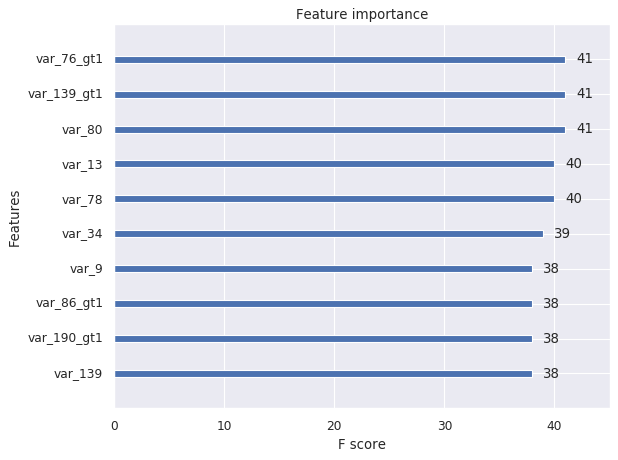

In [96]:
print('plot top10 important features')
xgb.plot_importance(clf,max_num_features=10)
plt.show()

The validation AUC is improved to 0.934 within 11 minutes and it could be placed top 1% of the competition. The full notebook can be found here. This solution constitutes our best single model. In our full solution, we built an ensemble with a customized neural network model and utilize data augmentation. Our final solution is only 0.002 less than the first place winner of the competition.